In [83]:
import numpy as np
import matplotlib.pyplot as plt # menggambarkan grafik
plt.style.use('seaborn-poster')
%matplotlib inline
!pip install texttable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
# Definisi parameter
f = lambda t, s: t + s # ODE
# t = x dan s = y

x0 = 0
y0 = 1
xn = 0.1
n  = 10 # n = (xn-x0)/h
h  = (xn-x0)/n # ukuran langkah

h =  0.01


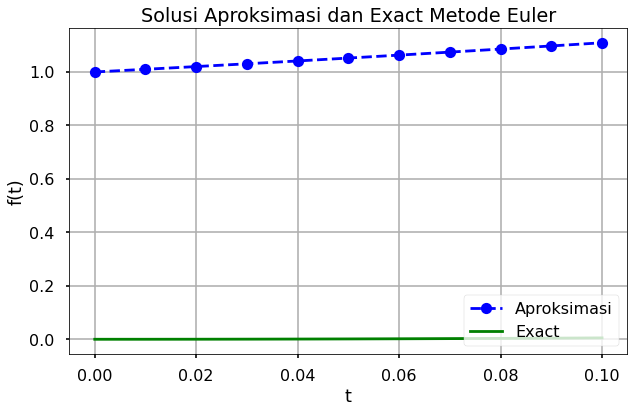

ya = 1.109244250822409
ys = 0.005170918075647624
galat relatif absolut =  21351.592049898863 %


In [85]:
# Metode Euler 
def euler(f,x0,y0,xn,n):
  print('h = ', h)
  t = np.arange(x0, xn + h, h) # grid Numerik
  s0 = y0 # kondisi awal
  
  # Metode Euler
  s = np.zeros(len(t))
  s[0] = s0
  for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])
    t[i + 1] = t[i] + h
  return t, s

# Menampilkan grafik
t,s = euler(f,x0,y0,xn,n)
plt.figure(figsize = (10, 6))
plt.plot(t, s, 'bo--', label='Aproksimasi')
plt.plot(t, np.exp(t) - t - 1, 'g', label='Exact') 
plt.title('Solusi Aproksimasi dan Exact Metode Euler')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Perhitungan galat
sol_euler = s[10]
sol_exact = np.exp(0.1) - 0.1 - 1
galat_euler = abs((sol_exact-sol_euler)/sol_exact)*100

print('ya =',sol_euler)
print('ys =',sol_exact)
print('galat relatif absolut = ',galat_euler,'%')

h =  0.01


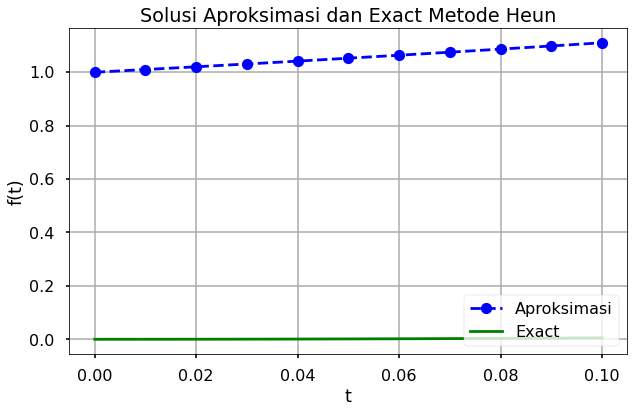

ya = 1.1103381797700187
ys = 0.005170918075647624
galat relatif absolut =  21372.74746043924 %


In [86]:
# Metode Heun 
def heun(f,x0,y0,xn,n):
  print('h = ', h)
  t = np.arange(x0, xn + h, h) # grid Numerik
  s0 = y0 # kondisi awal
  
  # Metode heun
  s = np.zeros(len(t))
  s[0] = s0
  for i in range(0, len(t) - 1):
    k1 = h*f(t[i], s[i])
    k2 = h*f(t[i]+h, s[i]+k1)
    s[i+1] = s[i] + 0.5*(k1+k2)
    t[i+1] = t[i] + h
  return t, s
 
# Menampilkan grafik
t,s = heun(f,x0,y0,xn,n)
plt.figure(figsize = (10, 6))
plt.plot(t, s, 'bo--', label='Aproksimasi')
plt.plot(t, np.exp(t) - t - 1, 'g', label='Exact')
plt.title('Solusi Aproksimasi dan Exact Metode Heun')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Perhitungan galat
sol_heun  = s[10]
sol_exact = np.exp(0.1) - 0.1 - 1
galat_heun = abs((sol_exact-sol_heun)/sol_exact)*100

print('ya =',sol_heun)
print('ys =',sol_exact)
print('galat relatif absolut = ', galat_heun,'%')

h =  0.01


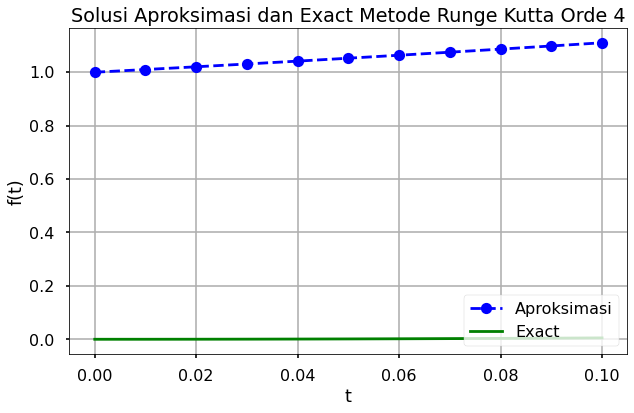

ya =  1.1103418361330284
ys =  0.005170918075647624
galat relatif absolut =  21372.818170571485 %
t =  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
n =  10
s =  [1.         1.01010033 1.02040268 1.03090907 1.04162155 1.05254219
 1.06367309 1.07501636 1.08657414 1.09834857 1.11034184]
solusi exact =  [0.00000000e+00 5.01670842e-05 2.01340027e-04 4.54533954e-04
 8.10774192e-04 1.27109638e-03 1.83654655e-03 2.50818125e-03
 3.28706767e-03 4.17428371e-03 5.17091808e-03]


In [87]:
# Metode Runge Kutta orde 4 
def rungekutta4(f,x0,y0,xn,n):
  print('h = ', h)
  t = np.arange(x0, xn + h, h) # grid Numerik
  s0 = y0 # kondisi awal
  
  # Metode Runge Kutta orde 4 
  s = np.zeros(len(t))
  s[0] = s0
  for i in range(0, len(t) - 1):
    # k1, k2, k3, k4 mencari gradien (get 6 gradien)
    k1 = h*f(t[i], s[i])
    k2 = h*f(t[i] + 0.5*h, s[i]+ 0.5*k1)
    k3 = h*f(t[i] + 0.5*h, s[i]+ 0.5*k2)
    k4 = h*f(t[i] + h, s[i]+k3)
    s[i+1] = s[i] + (1/6)*(k1 + 2*k2 + 2*k3+ k4) # y sblmnya + avg gradien = y setelahnya
    t[i+1] = t[i] + h
  return t, s
 
t,s = rungekutta4(f,x0,y0,xn,n)
plt.figure(figsize = (10, 6))
plt.plot(t, s, 'bo--', label='Aproksimasi')
plt.plot(t, np.exp(t) - t - 1, 'g', label='Exact')
plt.title('Solusi Aproksimasi dan Exact Metode Runge Kutta Orde 4')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

sol_rk = s[n]
sol_exact = np.exp(0.1) - 0.1 - 1
galat_rk  = abs((sol_exact-sol_rk)/sol_exact)*100

print('ya = ',sol_rk)
print('ys = ',sol_exact)
print('galat relatif absolut = ',galat_rk,'%')
print('t = ',t)
print('n = ',n)
print('s = ',s)
print('solusi exact = ', np.exp(t) - t - 1)

In [69]:
print("\t\t\t\tProgram untuk Menyelesaian Persamaan Differensial")
print("\t\t\t\t\tdy/dx = x + y; syarat y(0) = 1")
print("\t\t\t\tdengan Metode Euler, Heun, dan Runge Kutta Orde 4")
print("\t\t\t\tDibuat oleh :")
print("\t\t\t\t\tNama        : Oktaviana Sadama Nur Azizah")
print("\t\t\t\t\tNIM         : 24060121130060")
print("\t\t\t\t\tProg. Studi : Informatika")
print("\n")

# Tabel
from texttable import Texttable
l = [["x", "h", "y_Analitik", "y_Euler", "Error %", "y_Heun", "Error %", "y_RungeKutta4", "Error %"]]
m = [[xn, h, y0, sol_euler, galat_euler, sol_heun, galat_heun, sol_rk, galat_rk]]

table = Texttable()
table.set_cols_width([4,4,10,10,10,10,10,13,10])
table.add_rows(l)
print(table.draw())
table.add_rows(m)
print(table.draw())

				Program untuk Menyelesaian Persamaan Differensial
					dy/dx = x + y; syarat y(0) = 1
				dengan Metode Euler, Heun, dan Runge Kutta Orde 4
				Dibuat oleh :
					Nama        : Oktaviana Sadama Nur Azizah
					NIM         : 24060121130060
					Prog. Studi : Informatika


+------+------+------------+------------+------------+------------+------------+---------------+------------+
|  x   |  h   | y_Analitik |  y_Euler   |  Error %   |   y_Heun   |  Error %   | y_RungeKutta4 |  Error %   |
+======+======+============+============+============+============+============+===============+============+
+------+------+------------+------------+------------+------------+------------+---------------+------------+
+------+------+------------+------------+------------+------------+------------+---------------+------------+
| 0.1  | 0.01 |     1      | 1.10924425 | 21351.5920 | 1.11033817 | 21372.7474 | 1.11034183613 | 21372.8181 |
|      |      |            |  0822409   |  49898863  |  97700187